# Import Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as plt
import seaborn as sns 
import random 
import matplotlib.pyplot as plt

# Read & Explore Data

In [2]:
pokemon = pd.read_csv("./pokemon.csv")
combat = pd.read_csv("./combats.csv")

In [3]:
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [4]:
combat.head(10)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


In [5]:
print("Dimenstions of Pokemon: " + str(pokemon.shape))
print("Dimenstions of Combat: " + str(combat.shape))

Dimenstions of Pokemon: (800, 13)
Dimenstions of Combat: (50000, 3)


In [6]:
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
combat.isnull().sum()

First_pokemon     0
Second_pokemon    0
Winner            0
dtype: int64

In [8]:
print("This pokemon is before the missing Pokemon: " + pokemon['Name'][61])
print(pokemon[pokemon['Name'].isnull()])
print("This pokemon is after the missing Pokemon: " + pokemon['Name'][63])

This pokemon is before the missing Pokemon: Mankey
Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []
This pokemon is after the missing Pokemon: Growlithe


In [9]:
pokemon['Name'][62] = "Primeape"

/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
# calculate the win % of each pokemon 
# add the calculation to the pokemon dataset 
total_Wins = combat.Winner.value_counts()
# get the number of wins for each pokemon
numberOfWins = combat.groupby('Winner').count()

#both methods produce the same results
countByFirst = combat.groupby('Second_pokemon').count()
countBySecond = combat.groupby('First_pokemon').count()
print("Looking at the dimensions of our dataframes")
print("Count by first winner shape: " + str(countByFirst.shape))
print("Count by second winner shape: " + str(countBySecond.shape))
print("Total Wins shape : " + str(total_Wins.shape))

Looking at the dimensions of our dataframes
Count by first winner shape: (784, 2)
Count by second winner shape: (784, 2)
Total Wins shape : (783,)


In [11]:
find_losing_pokemon= np.setdiff1d(countByFirst.index.values, numberOfWins.index.values)-1 #offset because the index and number are off by one
losing_pokemon = pokemon.iloc[find_losing_pokemon[0],]
print(losing_pokemon)

#                 213
Name          Shuckle
Type 1            Bug
Type 2           Rock
Total             505
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object


In [12]:
numberOfWins = numberOfWins.sort_index()
numberOfWins['Total Fights'] = countByFirst.Winner + countBySecond.Winner
numberOfWins['Win Percentage']= numberOfWins.First_pokemon/numberOfWins['Total Fights']

# merge the winning dataset and the original pokemon dataset
results2 = pd.merge(pokemon, numberOfWins, right_index = True, left_on='#')
results3 = pd.merge(pokemon, numberOfWins, left_on='#', right_index = True, how='left')

# We can look at the difference between the two datasets to see which pokemon never recorded a fight
#missing_Pokemon = np.setdiff1d(pokemon.index.values, results3.index.values)
#subset the dataframe where pokemon win percent is NaN
results3[results3['Win Percentage'].isnull()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False,NaN,NaN,NaN,NaN
38,33,Nidorino,Poison,NaN,365,61,72,57,55,55,65,1,False,NaN,NaN,NaN,NaN
51,46,Paras,Bug,Grass,285,35,70,55,45,55,25,1,False,NaN,NaN,NaN,NaN
72,66,Machop,Fighting,NaN,305,70,80,50,35,35,35,1,False,NaN,NaN,NaN,NaN
84,78,Rapidash,Fire,NaN,500,65,100,70,80,80,105,1,False,NaN,NaN,NaN,NaN
97,90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False,NaN,NaN,NaN,NaN
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,NaN,NaN,NaN,NaN
198,183,Marill,Water,Fairy,250,70,20,50,20,50,40,2,False,NaN,NaN,NaN,NaN
250,231,Phanpy,Ground,NaN,330,90,60,60,40,40,40,2,False,NaN,NaN,NaN,NaN
255,236,Tyrogue,Fighting,NaN,210,35,35,35,35,35,35,2,False,NaN,NaN,NaN,NaN


In [13]:
# Top 5 pokemon with lowest winning chance
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage']).head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
314,290,Nincada,Bug,Ground,266,31,45,90,30,30,40,3,False,3.0,3.0,138.0,0.021739
205,190,Aipom,Normal,NaN,360,55,70,55,40,55,85,2,False,3.0,3.0,122.0,0.024590
700,639,Terrakion,Rock,Fighting,580,91,129,90,72,90,108,5,True,4.0,4.0,129.0,0.031008
256,237,Hitmontop,Fighting,NaN,455,50,95,95,35,110,70,2,False,4.0,4.0,123.0,0.032520
638,577,Solosis,Psychic,NaN,290,45,30,40,105,50,20,5,False,5.0,5.0,128.0,0.039062


In [14]:
# Top 5 pokemon with highest winning chance
results3[np.isfinite(results3['Win Percentage'])].sort_values(by = ['Win Percentage'], ascending = False ).head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
169,155,Cyndaquil,Fire,NaN,309,39,52,43,60,50,65,2,False,127.0,127.0,129.0,0.984496
572,513,Pansear,Fire,NaN,316,50,53,48,53,48,64,5,False,116.0,116.0,119.0,0.974790
774,704,Goomy,Dragon,NaN,300,45,50,35,55,75,40,6,False,121.0,121.0,125.0,0.968000
25,20,Raticate,Normal,NaN,413,55,81,60,50,70,97,1,False,115.0,115.0,119.0,0.966387
168,154,Meganium,Grass,NaN,525,80,82,100,83,100,80,2,False,136.0,136.0,141.0,0.964539


In [15]:
results3.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,First_pokemon,Second_pokemon,Total Fights,Win Percentage
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,779.000000,779.000000,779.000000,779.000000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,63.997433,63.997433,127.857510,0.501253
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,33.081927,33.081927,11.373942,0.255180
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,3.000000,3.000000,92.000000,0.021739
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,36.000000,36.000000,120.000000,0.279437
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,63.000000,63.000000,128.000000,0.500000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,90.500000,90.500000,135.000000,0.712999
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,152.000000,152.000000,164.000000,0.984496


# Visualizing the Data 

Text(0.5, 1.0, 'Total Pokemon by Type 1')

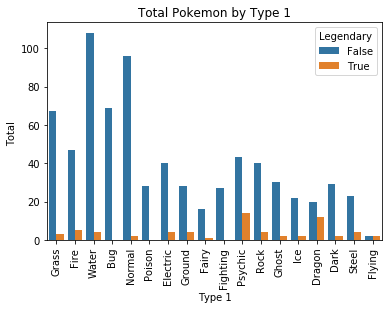

In [16]:
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=results3)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 1")

Text(0.5, 1.0, 'Total Pokemon by Type 2')

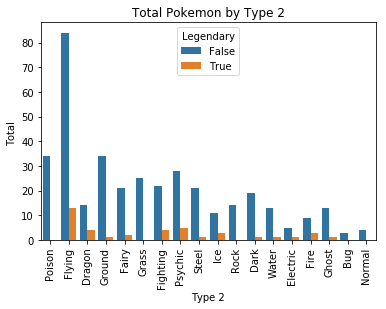

In [17]:
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 2", hue="Legendary", data=results3)
plt.xticks(rotation= 90)
plt.xlabel('Type 2')
plt.ylabel('Total ')
plt.title("Total Pokemon by Type 2")

In [18]:
results3.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

,Win Percentage
Type 1,
Steel,0.410767
Fairy,0.422051
Psychic,0.434629
Grass,0.471115
Fire,0.473544
Electric,0.476727
Ground,0.499557
Dark,0.508594
Ice,0.510677


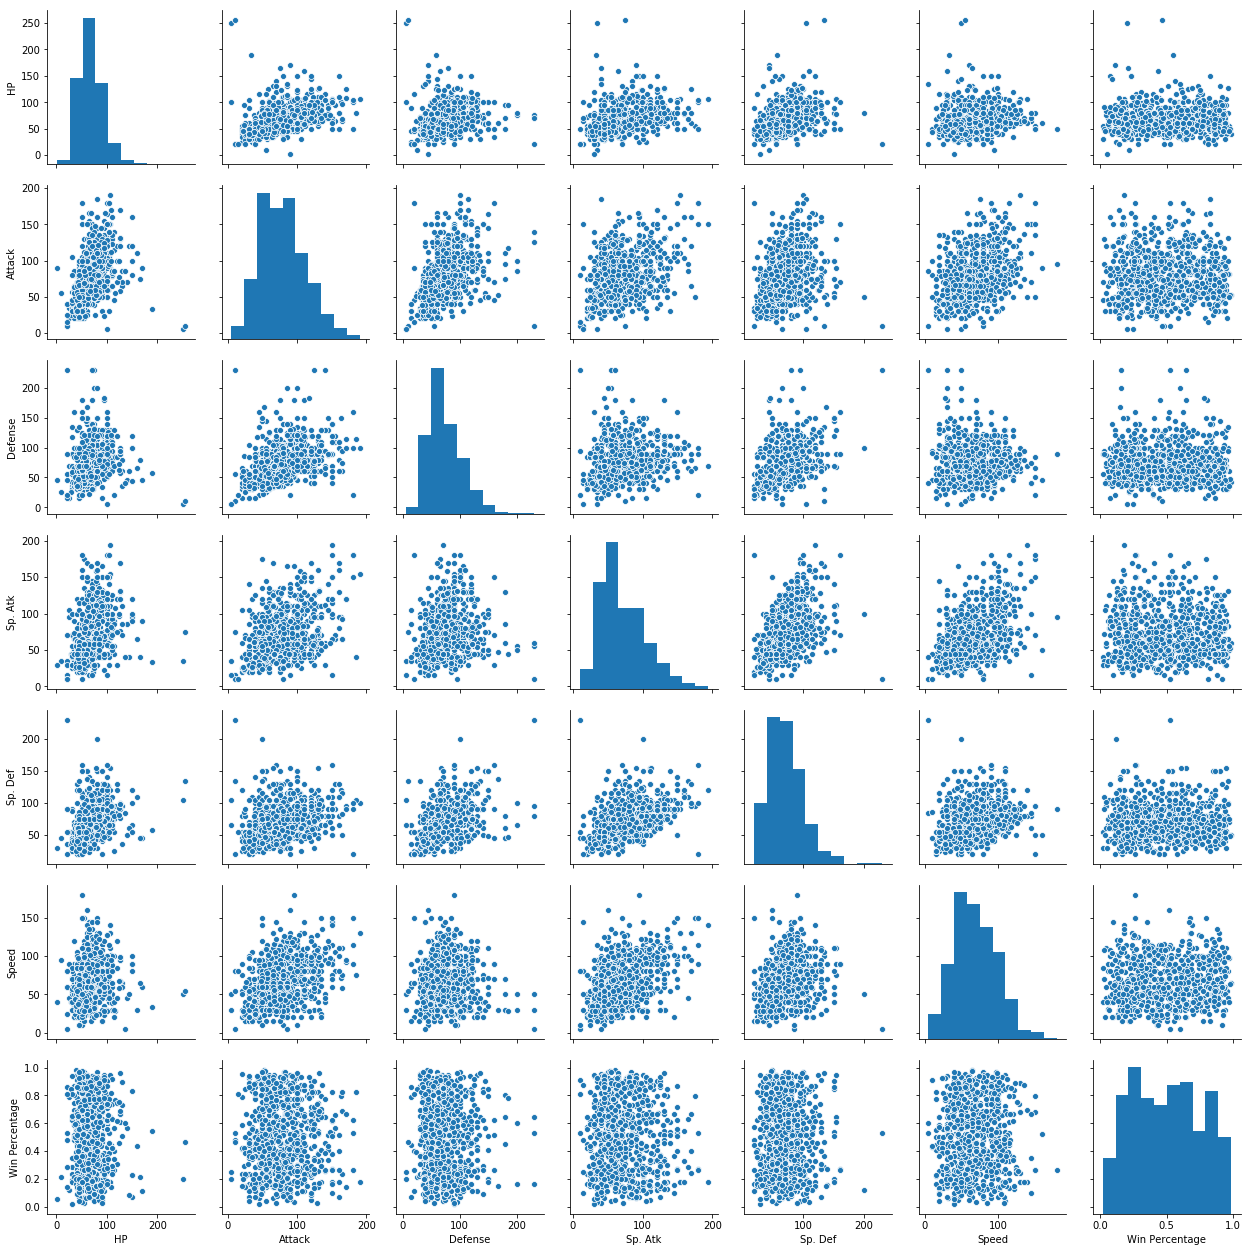

In [19]:
#sns.distplot(results3["Win Percentage"].dropna(), bins=20)
col = ['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win Percentage']
#results3.loc[:,'HP':'Speed'].corr()
sns.pairplot(results3.loc[:,col].dropna())

In [20]:
# Correlation table
results3.loc[:,col].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Win Percentage
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.003335
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.005679
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.025334
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,-0.047751
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,-0.003264
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.016443
Win Percentage,0.003335,0.005679,0.025334,-0.047751,-0.003264,0.016443,1.000000


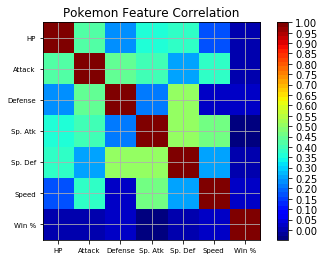

In [21]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Pokemon Feature Correlation')
    labels=['Type 1','HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win %']
    ax1.set_xticklabels(labels,fontsize=7)
    ax1.set_yticklabels(labels,fontsize=7)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.00,.05,.10,.15,.20,.25,.30,.35,.40,.45,.50,.55,.60,.65,.70,.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(results3.loc[:,col])

/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


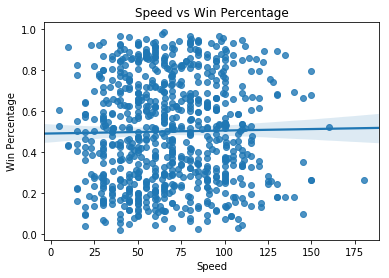

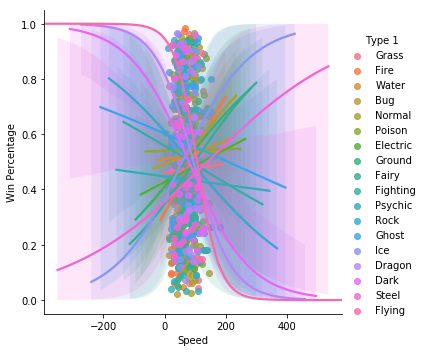

In [22]:
sns.regplot(x="Speed", y="Win Percentage", data=results3, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="Win Percentage", data=results3, hue = 'Type 1',  logistic=True)#.set_title("Speed vs Win Percentage")

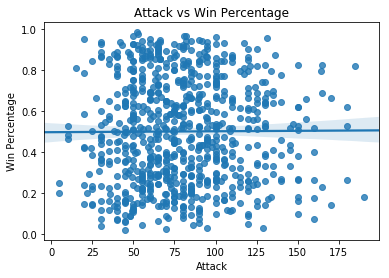

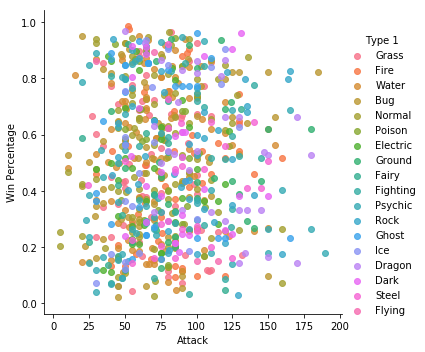

In [23]:
ax = sns.regplot(x="Attack", y="Win Percentage", data=results3).set_title("Attack vs Win Percentage")
sns.lmplot(x="Attack", y="Win Percentage", data=results3, hue = 'Type 1',fit_reg =False)

# Preprocessing Data

In [24]:
dataset = results2

In [30]:
#remove rows with NA values because it will cause errors when fitting to the model
dataset.dropna(axis=0, how='any')
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:, 5:11].values
y = dataset.iloc[:, 15].values

# Encoding categorical data (if there is some)
# In this case it could be pokemon type
#'''from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#labelencoder = LabelEncoder()
#X[:, 3] = labelencoder.fit_transform(X[:, 3])
#onehotencoder = OneHotEncoder(categorical_features = [3])
#X = onehotencoder.fit_transform(X).toarray()'''

# Avoiding the Dummy Variable Trap
#X = X[:, 1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Create Model

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)
report = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

          92       0.00      0.00      0.00         0
          95       0.00      0.00      0.00         1
          98       0.00      0.00      0.00         0
         102       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         2
         108       0.00      0.00      0.00         2
         109       0.00      0.00      0.00         2
         110       0.00      0.00      0.00         6
         111       0.00      0.00      0.00         7
         112       0.00      0.00      0.00         2
         114       0.00      0.00      0.00         4
         115       0.00      0.00      0.00         2
         116       0.00      0.00      0.00         6
         117       0.00      0.00      0.00         5
         118       0.00      0.00      0.00         4
         119       0.00      0.00      0.00        10
         120       0.00    

/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda2/envs/py3/lib/python3.6/site-packages/s

# Regression Model

In [37]:
def ml_linearreg(X_train, X_test, y_train, y_test):
    # Fitting Multiple Linear Regression to the Training set
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    print(regressor.score(X_train, y_train))
    # Predicting the Test set results
    y_pred = regressor.predict(X_test)

    # Validating the results
    from sklearn.metrics import mean_absolute_error
    from math import sqrt
    mae = mean_absolute_error(y_test, y_pred)
    #print("Mean Absolute Error: " + str(mae))
    return mae

ml_linearreg(X_train, X_test, y_train, y_test)

0.014519122025397735


8.839776170426239

# Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
prediction = dtc.predict(X_test)
matrix = classification_report(y_test, prediction)

print(matrix)

              precision    recall  f1-score   support

          95       0.00      0.00      0.00         1
          97       0.00      0.00      0.00         0
          99       0.00      0.00      0.00         0
         102       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         2
         107       0.00      0.00      0.00         0
         108       0.00      0.00      0.00         2
         109       0.00      0.00      0.00         2
         110       0.00      0.00      0.00         6
         111       0.00      0.00      0.00         7
         112       0.00      0.00      0.00         2
         113       0.00      0.00      0.00         0
         114       0.00      0.00      0.00         4
         115       0.00      0.00      0.00         2
         116       0.00      0.00      0.00         6
         117       0.00      0.00      0.00         5
         118       0.25    

/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda2/e

In [40]:
report = confusion_matrix(y_test, prediction)

print(report)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
prediction = rf.predict(X_test)
matrix = classification_report(y_test, prediction)

print(matrix)

              precision    recall  f1-score   support

          95       0.00      0.00      0.00         1
          97       0.00      0.00      0.00         0
          99       0.00      0.00      0.00         0
         100       0.00      0.00      0.00         0
         102       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         2
         107       0.00      0.00      0.00         0
         108       0.00      0.00      0.00         2
         109       0.00      0.00      0.00         2
         110       0.00      0.00      0.00         6
         111       0.00      0.00      0.00         7
         112       0.09      0.50      0.15         2
         113       0.00      0.00      0.00         0
         114       0.00      0.00      0.00         4
         115       0.00      0.00      0.00         2
         116       0.33      0.17      0.22         6
         117       0.20    

/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/anaconda2/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/envs

In [42]:
report = confusion_matrix(y_test, prediction)

print(report)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
